In [1]:
import galprime as gp

from astropy.io import fits
from astropy.table import Table
from astropy.visualization import ZScaleInterval


import numpy as np

import os

from matplotlib import pyplot as plt

from tqdm import tqdm

Loaded image with shape (4200, 4200)
Loaded object table with 2087595 rows


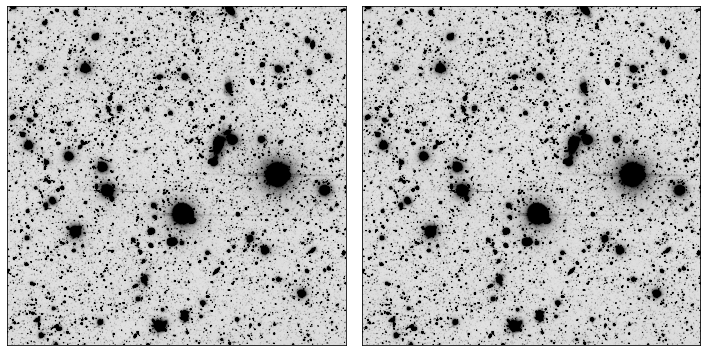

In [3]:
class BGSelector:

    def __init__(self, filename, table=None, **kwargs):
        self.filename = filename

        self.kwargs = kwargs
        self.data = None 
        self.table = table
        
        self.load_data()

    def load_data(self, **kwargs):
        kwargs.update(self.kwargs)
        img_index = kwargs.get("IMG_INDEX", 1)
        
        with fits.open(self.filename) as hdul:
            self.data = hdul[img_index].data
            print(f"Loaded image with shape {self.data.shape}")
        
        if self.table is not None:
            self.table = Table.read(self.table, format=kwargs.get("table_format", "fits"))
            print(f'Loaded object table with {len(self.table)} rows')

        
    def process_backgrounds(self, args):
        pass
    
    def show_data(self, **kwargs):
        width = kwargs.get("width", 10)
        fig, ax = plt.subplots(1, 2, figsize=(width, width * self.data.shape[1] / self.data.shape[0] / 2),
                         facecolor="white")

        _data = np.copy(self.data)
        if kwargs.get("log", True):
            _data = np.log10(_data)
        
        if kwargs.get("lims", None) is not None:
            lims = kwargs.get("lims")
        elif kwargs.get("zscale", False):
            lims = ZScaleInterval(contrast=kwargs.get("contrast", 0.25)).get_limits(_data)
        else:
            lims = np.nanmin(_data), np.nanmax(_data)

        for axis in ax:
            axis.imshow(_data, cmap=kwargs.get("cmap", "Greys"), vmin=lims[0], vmax=lims[1])

            if not kwargs.get("show_ticks", False):
                axis.set(xticks = [], yticks = [])
        
        plt.tight_layout()
        plt.show()
    
    
BGSelection = BGSelector("../pdata/IMAGES/PDR2_i_9813_3,6.fits", table="../pdata/COSMOS_V9_MAGS.fits")
BGSelection.show_data(zscale=True, log=False)